In [ ]:

# fit an ARIMA model and plot residual errors

import pandas as pd
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import io
from google.colab import files
import tensorflow as tf

# Set random seed to get the same result after each time running the code
tf.random.set_seed(1234)

uploaded = files.upload()




Saving ercot_raw.csv to ercot_raw (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ercot_raw.csv']))
df.rename(columns = {'Hour Ending':'date', 'ERCOT':'usage'}, inplace = True)
df['date'] = pd.to_datetime(df['date'])

df['usage'] = pd.to_numeric(df['usage'])
df.set_index('date',inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname DST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,usage
date,
2017-01-01 01:00:00,29420.64
2017-01-01 02:00:00,28870.81
2017-01-01 03:00:00,28211.72
2017-01-01 04:00:00,27820.29
2017-01-01 05:00:00,27628.96


In [ ]:
df.drop(index=df.index[-1], 
        axis=0, 
        inplace=True)

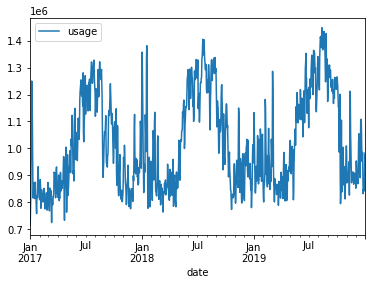

In [ ]:
df_daily = df.resample('D').apply(sum)
df_daily.plot()

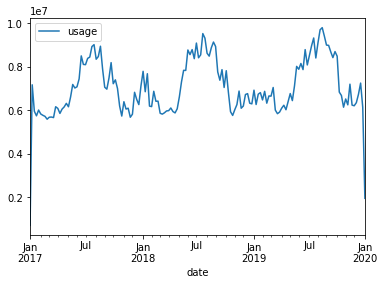

In [ ]:
df_weekly = df.resample('W').apply(sum)
df_weekly.plot()

In [ ]:
# Split train data and test data
# df_weekly = df.resample('W').apply(sum)
train_size = round(len(df_weekly)*0.67)

# train_data = df.WC.loc[:train_size] -----> it gives a series
# Do not forget use iloc to select a number of rows
train_data = df_weekly.iloc[:train_size]
test_data = df_weekly.iloc[train_size:]

                             ARIMA Model Results                              
Dep. Variable:                D.usage   No. Observations:                  157
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2355.983
Method:                       css-mle   S.D. of innovations         795449.520
Date:                Sun, 13 Mar 2022   AIC                           4725.966
Time:                        22:52:27   BIC                           4747.360
Sample:                    01-08-2017   HQIC                          4734.655
                         - 01-05-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7903.5488   4.86e+04      0.162      0.871   -8.74e+04    1.03e+05
ar.L1.D.usage    -0.2739      0.121     -2.261      0.025      -0.511      -0.036
ar.L2.D.usage    -0.2009      0.124     

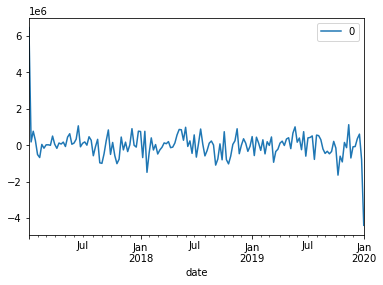

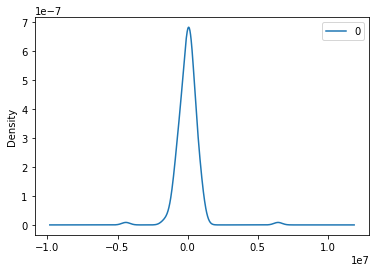

                  0
count  1.570000e+02
mean   9.621962e+03
std    8.147341e+05
min   -4.402039e+06
25%   -3.471730e+05
50%    4.227656e+04
75%    3.391522e+05
max    6.455853e+06


In [ ]:
model = ARIMA(df_weekly, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
test_data.head()

,USAGE
DATE,
2018-06-30,313.64
2018-07-31,317.36
2018-08-31,277.52
2018-09-30,276.00
2018-10-31,162.64


predicted=6501402.562664, expected=6301752.428180
predicted=6528181.370085, expected=6931344.775180
predicted=6819950.589459, expected=6272497.175210
predicted=6452125.592709, expected=6746929.605880
predicted=6755041.068748, expected=6818795.011290
predicted=6737473.922096, expected=6483303.272630
predicted=6778497.105589, expected=6878084.275010
predicted=6797193.983319, expected=6333267.315440
predicted=6594249.024540, expected=6665205.061060
predicted=6750711.953072, expected=6656765.976890
predicted=6579788.339992, expected=7055131.059660
predicted=7022991.544252, expected=6016462.885730
predicted=6394757.442353, expected=5850268.129550
predicted=6293107.277784, expected=5922940.219470
predicted=5952205.674269, expected=6105461.860260
predicted=6071135.488468, expected=6238323.515030
predicted=6053663.933639, expected=6032185.998910
predicted=6125941.339862, expected=6396199.850830
predicted=6378525.255856, expected=6775377.011690
predicted=6628460.432215, expected=6451516.123890


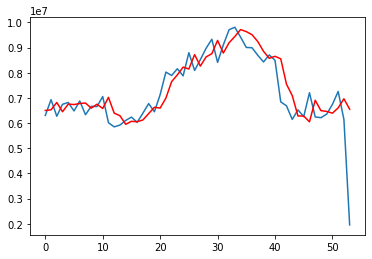

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
X = df_daily.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
  
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
errors = predictions - test
mape = np.mean(np.abs(errors/test))*100
print('Mean Absolute Percentage Error: {:.4f}'.format(mape))
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=866320.556828, expected=885269.473410
predicted=913174.619875, expected=780414.950110
predicted=762845.837310, expected=827712.227940
predicted=880667.151116, expected=848398.589690
predicted=855855.840675, expected=944426.546910
predicted=967695.348972, expected=1001561.679500
predicted=981115.019812, expected=1013968.960620
predicted=987683.865266, expected=946271.937210
predicted=910302.457533, expected=983526.186060
predicted=995294.065330, expected=1132862.733290
predicted=1138707.414245, expected=1100968.314610
predicted=1032096.415576, expected=1019282.073650
predicted=983894.542650, expected=907936.319840
predicted=893258.401291, expected=840497.210520
predicted=861520.550830, expected=834733.364500
predicted=868734.894468, expected=853905.051640
predicted=882975.223814, expected=884684.455000
predicted=904854.124246, expected=933527.776010
predicted=947323.663685, expected=919761.102210
predicted=908189.806821, expected=879827.252930
predicted=877751.233840, expected

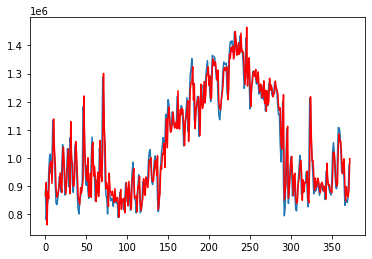

In [ ]:
X = df_daily.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,5))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
  
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
errors = predictions - test
mape = np.mean(np.abs(errors/test))*100
print('Mean Absolute Percentage Error: {:.4f}'.format(mape))
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=872234.568850, expected=799441.561970
predicted=815121.511576, expected=773873.201620
predicted=805193.793925, expected=812501.996750
predicted=852162.984317, expected=815858.900550
predicted=828209.058780, expected=830004.141420
predicted=848206.236719, expected=824596.411630
predicted=831836.740113, expected=828803.118300
predicted=840913.808312, expected=817339.191760
predicted=821855.153526, expected=840495.720600
predicted=855209.312041, expected=914136.084960
predicted=925886.211304, expected=943011.024010
predicted=924957.710798, expected=901846.416790
predicted=876170.252518, expected=827130.501400
predicted=815389.479407, expected=826341.272220
predicted=846945.959841, expected=797048.791870
predicted=799058.353354, expected=823836.896490
predicted=847177.108602, expected=894068.224150
predicted=907403.668523, expected=936082.957840
predicted=924697.201165, expected=956170.535890
predicted=939002.582085, expected=882236.341520
predicted=849227.314146, expected=865915

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=812223.989677, expected=797764.584000
predicted=817609.948330, expected=799765.962080
predicted=827128.227295, expected=817163.497490
predicted=837093.307650, expected=971075.076590
predicted=1011193.680636, expected=980594.052790
predicted=939865.943943, expected=905329.432950
predicted=876541.373668, expected=857024.454470
predicted=857518.039505, expected=864181.974990
predicted=881794.613689, expected=817290.188980
predicted=815059.153536, expected=806695.778100
predicted=833836.439982, expected=881826.015820
predicted=913828.650868, expected=963640.947760
predicted=961959.568795, expected=982895.581190
predicted=955543.405642, expected=935830.440110
predicted=903657.256927, expected=955083.712310
predicted=954028.345220, expected=1004882.934100
predicted=999043.722328, expected=1008604.185730
predicted=989553.912819, expected=1034081.301250
predicted=1034059.116868, expected=1024234.038980
predicted=1006465.448748, expected=919345.737320
predicted=892679.164058, expected

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=971510.847108, expected=897119.290480
predicted=869519.693350, expected=1072180.740430
predicted=1127864.426368, expected=1053831.274900
predicted=995194.296486, expected=1000784.673390
predicted=984219.565381, expected=911574.344410
predicted=897674.079995, expected=878524.333050
predicted=901059.651021, expected=926383.056390
predicted=957751.865540, expected=1040599.139990
predicted=1059495.322943, expected=1052417.997590
predicted=1019991.197540, expected=976765.770390
predicted=946266.657932, expected=867727.886380
predicted=860860.799793, expected=817857.279200
predicted=849030.140996, expected=801552.142690
predicted=837107.887086, expected=853635.997230
predicted=896061.216673, expected=865179.825790
predicted=874653.167118, expected=882256.598500
predicted=895319.873692, expected=913364.505510
predicted=920951.798723, expected=1181912.308270
predicted=1219629.268247, expected=1152933.787840
predicted=1050208.461708, expected=1028801.251870
predicted=974943.792915, ex

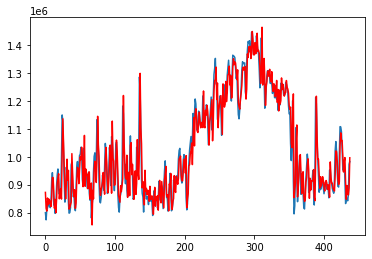

In [ ]:
X = df_daily.values
size = int(len(X) * 0.67)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
  
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
errors = predictions - test
mape = np.mean(np.abs(errors/test))*100
print('Mean Absolute Percentage Error: {:.4f}'.format(mape))
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()